In [19]:
from fastai.vision.all import *
from fastbook import *
%matplotlib inline

In [2]:
path = untar_data(URLs.PASCAL_2007)
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [3]:
dblock = DataBlock()

In [4]:
dblock

In [5]:
dsets = dblock.datasets(df)

In [6]:
dsets.train[0]

(fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object,
 fname       008663.jpg
 labels      car person
 is_valid         False
 Name: 4346, dtype: object)

In [15]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')
def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x = get_x, get_y = get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dsets = dblock.datasets(df)
dsets.train[0]

(PILImage mode=RGB size=500x333,
 TensorMultiCategory([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [16]:
dls = dblock.dataloaders(df)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


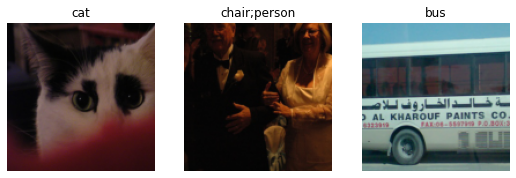

In [20]:
dls.show_batch(nrows=1, ncols=3)

In [22]:
learn = cnn_learner(dls, resnet18)
x, y = to_cpu(dls.train.one_batch())
activs = learn.model(x)
activs.shape

torch.Size([64, 20])